<a href="https://colab.research.google.com/github/iamtatha/Mental-Health/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.decomposition import PCA

np.random.seed(42)

In [ ]:
def run_svm():

  # X_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/all_label_train.csv')
  # Y_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/all_label_target.csv')

  # X_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/wo_onehot_train.csv')
  # Y_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/wo_onehot_target.csv')

  X_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/train.csv')
  Y_values = pd.read_csv('https://raw.githubusercontent.com/iamtatha/Mental-Health/main/Data/target.csv')


  df = pd.concat([X_values, Y_values],axis=1)

  scaled_data = df
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data))

  X_train, X_test, Y_train, Y_test = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], train_size=0.80)

  pca = PCA(n_components = 'mle')
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  n = np.array(X_train).shape[1]

  classifier = SVC(kernel='rbf', random_state = 1, gamma='auto', probability=True)
  # classifier = SVC()
  metric = classifier.fit(X_train, Y_train)
  pred = classifier.predict(X_test)
  ytest_prob = classifier.predict_proba(X_test)
  ytest_prob = ytest_prob[:, 1]

  normal_prob = [0]*len(pred) 
  normal_auc = roc_auc_score(pred, normal_prob)
  predicted_auc = roc_auc_score(pred, ytest_prob)
  normal_fpos, normal_tpos, empty = roc_curve(pred, normal_prob)
  ytest_fpos, ytest_tpos, empty = roc_curve(pred, ytest_prob)

  print(accuracy_score(pred, Y_test))
  print("Precision Score: ", precision_score(Y_test, pred))
  print("Recall Score: ", recall_score(Y_test, pred))
  print("F1 Score: ", f1_score(Y_test, pred))
  print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
  return accuracy_score(pred, Y_test), precision_score(Y_test, pred), recall_score(Y_test, pred), f1_score(Y_test, pred), accuracy_score(classifier.predict(X_train), Y_train), confusion_matrix(Y_test, pred), [normal_fpos, normal_tpos, ytest_fpos, ytest_tpos]

In [ ]:
acc = []
run_avg = []
x = []
out = []
sum = 0

for i in range(100):
  print('Iteration: ', i+1)
  x.append(i+1)
  ret = run_svm()
  acc.append(ret[0])
  out.append(ret)
  sum += acc[-1]
  run_avg.append(sum/(i+1))

Iteration:  1
0.8492063492063492
Precision Score:  0.7756410256410257
Recall Score:  0.9758064516129032
F1 Score:  0.8642857142857143
Confusion Matrix:  [[ 93  35]
 [  3 121]]
Iteration:  2
0.8293650793650794
Precision Score:  0.782051282051282
Recall Score:  0.9312977099236641
F1 Score:  0.8501742160278746
Confusion Matrix:  [[ 87  34]
 [  9 122]]
Iteration:  3
0.8253968253968254
Precision Score:  0.7610062893081762
Recall Score:  0.952755905511811
F1 Score:  0.8461538461538461
Confusion Matrix:  [[ 87  38]
 [  6 121]]
Iteration:  4
0.7936507936507936
Precision Score:  0.7243589743589743
Recall Score:  0.9262295081967213
F1 Score:  0.8129496402877698
Confusion Matrix:  [[ 87  43]
 [  9 113]]
Iteration:  5
0.8531746031746031
Precision Score:  0.7931034482758621
Recall Score:  0.9426229508196722
F1 Score:  0.8614232209737829
Confusion Matrix:  [[100  30]
 [  7 115]]
Iteration:  6
0.8412698412698413
Precision Score:  0.8076923076923077
Recall Score:  0.9264705882352942
F1 Score:  0.86301

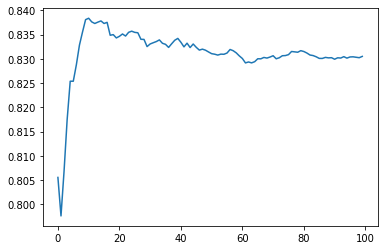

In [ ]:
plt.plot(run_avg)

In [ ]:
test = []
for i in Y_test:
  if i == 0:
    test.append([0,1])
  else:
    test.append([1,0])
Y_pp = classifier.predict_proba(X_test)

In [ ]:
# false_pos, true_pos, _ = roc_curve(test, Y_pp[:, 1])

In [ ]:
#@title Without One Hot
out[acc.index(max(acc))]

In [ ]:
#@title With One Hot
out[acc.index(max(acc))]

(0.9047619047619048,
 0.8636363636363636,
 0.9779411764705882,
 0.9172413793103449,
 0.8212512413108243,
 array([[ 95,  21],
        [  3, 133]]),
 [array([0., 1.]),
  array([0., 1.]),
  array([0., 0., 0., 1.]),
  array([0.        , 0.00649351, 1.        , 1.        ])])

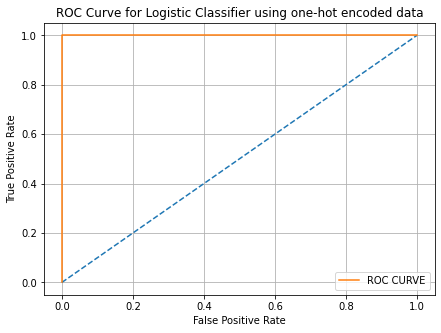

In [ ]:
normal_fpos = ret[6][0]
normal_tpos = ret[6][1]
ytest_fpos = ret[6][2]
ytest_tpos = ret[6][3]

plt.figure(figsize=(7,5))
plt.grid()
plt.plot(normal_fpos, normal_tpos, ls='--')
plt.plot(ytest_fpos, ytest_tpos, label='ROC CURVE')
plt.title('ROC Curve for Logistic Classifier using one-hot encoded data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()